---
title: Naive Bayes
format:
  html:
    css: h1
    embed-resources: true
    code-fold: true
---

## Introduction

Naive Bayes is a supervised machine learning algorithm based on Bayes' Theorem. It is used for classification tasks where every pair of features being classified is independent of each other.

While Naive Bayes might seem a simple process, its results are very insightful and have been proven to work very efficiently. One of the benefits is that it needs very little data to be trained and, as more data comes in, it can always be trained incrementally. The three most common Naive Bayes algorithms are: Gaussian Naive Bayes, Multinomial Naive Bayes, and Bernoulli Naive Bayes.

### Bayes' Theorem
The formula for Bayes' Theorem is: $P(\text{A}|\text{B}) = \frac{P(\text{B}|\text{A}) \times P(\text{A})} {P(\text{B})}$

### Gaussian Naive Bayes 
It is used when the variables are continuous and have a normal distribution

Formula:  $P(\text{class}|\text{data}) = \frac{P(\text{data}|\text{class}) \times P(\text{class})} {P(\text{data})}$

### Multinomial Naive Bayes
It is used when the variables are discrete and have a multinomial distribution.

### Bernoulli Naive Bayes
It is used when the variables are binary and have a Bernoulli distribution.

### Advantages of Naive Bayes:
- Missing values are ignored while training the model and ignored when a probability is calculated.
- Performs well even when the independence assumption is not satisfied.
- It is easily to interpretate and has fast prediction time.



## Naive Bayes for labeled record data


Naive Bayes has been used in our record data from our data set: Border_Crossing_Entry_Data_20231103.csv. The model tries to predict the method of transportation ("Measure" in the data set) based on the value and the State of entrance.

In [102]:
library(tidyverse)
library(caret)
library(e1071)
#library("DescTools")

chicago <- read.csv('../../data/Raw_Data_project_Pub.Transport_5000/Border_Crossing_Entry_Data_20231103.csv')
head(chicago)

chicago <- chicago[, c("Value", "Measure", "State")]
vars <- c("Value", "State")

set.seed(4444) # initialize the random seed

# Generate the list of observations for the
# train dataframe
sub <- createDataPartition(y = chicago$Measure, 
                           p = 0.80, 
                           list = FALSE)

chicago[] <- lapply(chicago, as.factor)

cen_bcs <- preProcess(x = chicago[ ,vars],
                      method = c("BoxCox", "center", "scale"))

DM_bcs <- predict(object = cen_bcs,
                      newdata = chicago)

train <- DM_bcs[sub, ] 
test <- DM_bcs[-sub, ]

# Train a Naive Bayes model
nb_model <- naiveBayes(Measure ~ ., data = train)

# Make predictions on the test data
predictions <- predict(nb_model, newdata = test)

# Ensure predictions contain all possible factor levels
predictions <- factor(predictions, levels = levels(test$Measure))

# Evaluate the model (e.g., confusion matrix)
confusion_matrix <- confusionMatrix(predictions, test$Measure)
print(confusion_matrix)

# Print additional classification performance metrics
print(confusion_matrix$byClass)

Confusion Matrix and Statistics

                             Reference
Prediction                    Bus Passengers Buses Pedestrians
  Bus Passengers                         181   129          80
  Buses                                  514  2172        1004
  Pedestrians                            668   273        1127
  Personal Vehicle Passengers            463    96         419
  Personal Vehicles                      279    43         106
  Rail Containers Empty                  100    82          22
  Rail Containers Loaded                1852  1839        2324
  Train Passengers                       368   289         228
  Trains                                 575   513         341
  Truck Containers Empty                 646   480         473
  Truck Containers Loaded                356   161         127
  Trucks                                 170    99          89
                             Reference
Prediction                    Personal Vehicle Passengers Personal Veh

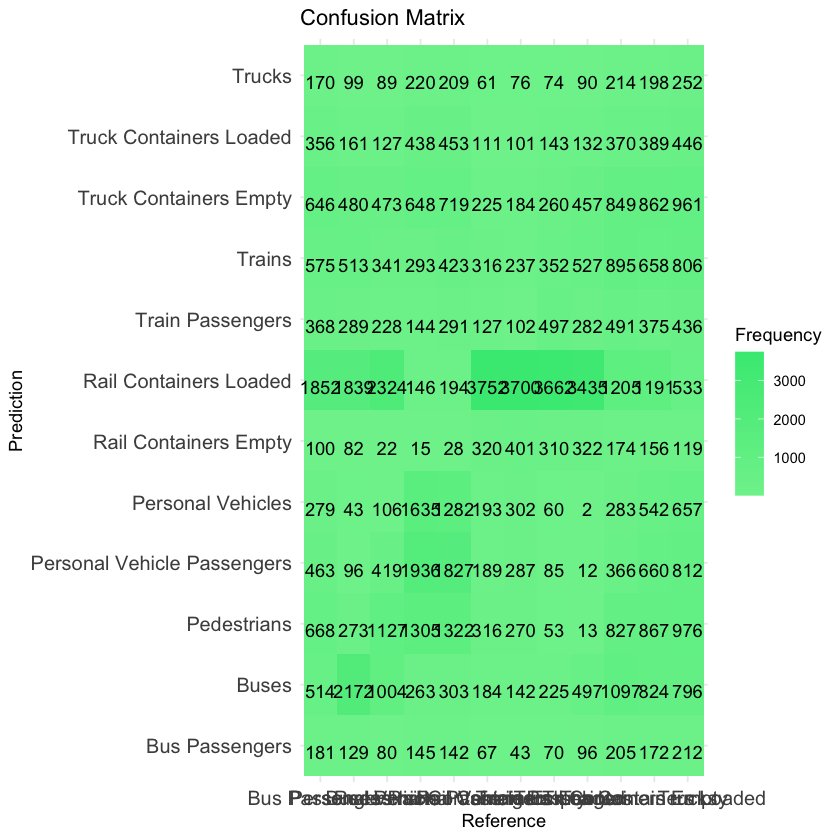

In [101]:
# Convert the confusion matrix to a data frame
confusion_matrix_df <- as.data.frame(as.table(confusion_matrix$table))

# Create the plot using ggplot2
library(ggplot2)
gg <- ggplot(data = confusion_matrix_df, aes(x = Reference, y = Prediction)) +
  geom_tile(aes(fill = Freq)) +
  geom_text(aes(label = Freq), vjust = 1) +
  scale_fill_gradient(low = "#7cf09b", high = "#3ee882") +
  labs(
    x = "Reference",
    y = "Prediction",
    fill = "Frequency"
  ) +
  theme_minimal() +
  theme(axis.text = element_text(size = 12)) +
  ggtitle("Confusion Matrix")

print(gg)


We can infer that this model would not be the best to predict this outcome, as its accruacy is only 17%.

## Naive Bayes for labeled text data
Naive Bayes has been used in our text data from redit in order to predict the sentiment of the comments. The data has been labeled by the sentiment of the comments as shown in the data gathering tab. The data has been split into a training set and a test set. The training set has been used to train the model and the test set has been used to test the model.

In [ ]:

# read in the data
df=pd.read_json("../../data/Raw_Data_project_Pub.Transport_5000/Reddit_sentiment_data/sentiment_results.json")
print(df.shape)
print(df.columns)

# throw away all empty strings of text from df along with their url and sentiment_score
df = df[df.text != '']
print(df.shape)
print(df.columns)

# convert sentiment_score to positive or negative
df['sentiment'] = df['sentiment_score'].apply(lambda score: 'positive' if score >= 0 else 'negative')

In [ ]:
texts = []
y = []
#https://spacy.io/usage/models

import re
import spacy.lang.en.stop_words as stopwords
import spacy
parser = spacy.load('en_core_web_sm')
stop_words = stopwords.STOP_WORDS


# Iterate over rows
for i in range(df.shape[0]):
    # QUICKLY CLEAN TEXT
    keep = "abcdefghijklmnopqrstuvwxyz "
    replace = ".,!;"
    tmp = ""
    text_value = df["text"].iloc[i]  # Accessing the "text" column using .iloc
    sentiment_value = df["sentiment"].iloc[i]  # Accessing the "sentiment" column using .iloc


    text_value = re.sub('[^a-zA-Z ]+', '', text_value.replace("<br />", "").lower())
    text_value = parser(text_value)
    tokens = [token.lower_ for token in text_value]
    #tokens = [token for token in text_value if token not in stop_words]
    tokens = [token.lemma_ for token in text_value if token not in stop_words]


    tmp = " ".join(tokens)
    texts.append(tmp)

    # CONVERT STRINGS TO INT TAGS
    if sentiment_value == "positive":
        y.append(1)
    elif sentiment_value == "negative":
        y.append(0)

    # PRINT FIRST COUPLE TEXTS
    if i < 3:
        print(i)
        print(tmp.replace("<br />", ""), '\n')
        print(tmp)
        print(sentiment_value, y[i])

# CONVERT Y TO NUMPY ARRAY
y=np.array(y)

from sklearn.feature_extraction.text import CountVectorizer

# PARAMETERS TO CONTROL SIZE OF FEATURE SPACE WITH COUNT-VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
# max_features=int, default=None
#   If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

def vectorize(corpus,MAX_FEATURES):
    vectorizer=CountVectorizer(max_features=MAX_FEATURES,stop_words="english")   
    # RUN COUNT VECTORIZER ON OUR COURPUS 
    Xs  =  vectorizer.fit_transform(corpus)   
    X=np.array(Xs.todense())
    #CONVERT TO ONE-HOT VECTORS (can also be done with binary=true in CountVectorizer)
    maxs=np.max(X,axis=0)
    return (np.ceil(X/maxs),vectorizer.vocabulary_)

(x,vocab0)=vectorize(texts,MAX_FEATURES=10000)


In [ ]:
#swap keys and values (value --> ley)
vocab1 = dict([(value, key) for key, value in vocab0.items()])

#RE-ORDER COLUMN SO IT IS SORTED FROM HIGH FREQ TERMS TO LOW 
# https://stackoverflow.com/questions/60758625/sort-pandas-dataframe-by-sum-of-columns
df2=pd.DataFrame(x)
s = df2.sum(axis=0)
df2=df2[s.sort_values(ascending=False).index[:]]

# REMAP DICTIONARY TO CORRESPOND TO NEW COLUMN NUMBERS
print()
i1=0
vocab2={}
for i2 in list(df2.columns):
    # print(i2)
    vocab2[i1]=vocab1[int(i2)]
    i1+=1

# RENAME COLUMNS 0,1,2,3 .. 
df2.columns = range(df2.columns.size)
print(df2.head())
print(df2.sum(axis=0))
x=df2.to_numpy()

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time
from sklearn.model_selection import train_test_split

def train_MNB_model(X, Y, i_print=False):
    if i_print:
        print(X.shape, Y.shape)

    # SPLIT USING train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # INITIALIZE MODEL
    model = MultinomialNB()

    # TRAIN MODEL
    start = time.process_time()
    model.fit(X_train, y_train)
    time_train = time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET
    start = time.process_time()
    yp_train = model.predict(X_train)
    yp_test = model.predict(X_test)
    time_eval = time.process_time() - start

    acc_train = accuracy_score(y_train, yp_train) * 100
    acc_test = accuracy_score(y_test, yp_test) * 100

    if i_print:
        print(acc_train, acc_test, time_train, time_eval)

    return acc_train, acc_test, time_train, time_eval

# TEST
print(type(x), type(y))
print(x.shape, y.shape)
(acc_train, acc_test, time_train, time_eval) = train_MNB_model(x, y, i_print=True)

##UTILITY FUNCTION TO INITIALIZE RELEVANT ARRAYS
def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]

# INITIALIZE ARRAYS
initialize_arrays()

# DEFINE SEARCH FUNCTION
def partial_grid_search(num_runs, min_index, max_index):
    for i in range(1, num_runs+1):
        # SUBSET FEATURES 
        upper_index=min_index+i*int((max_index-min_index)/num_runs)
        xtmp=x[:,0:upper_index]

        #TRAIN 
        (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtmp,y,i_print=False)

        if(i%5==0):
            print(i,upper_index,xtmp.shape[1],acc_train,acc_test)
            
        #RECORD 
        num_features.append(xtmp.shape[1])
        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)
        train_time.append(time_train)
        eval_time.append(time_eval)

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
partial_grid_search(num_runs=100, min_index=0, max_index=1000)

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
partial_grid_search(num_runs=20, min_index=1000, max_index=10000)

#UTILITY FUNCTION TO SAVE RESULTS
def save_results(path_root):
    out=np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out=pd.DataFrame(out)
    out.to_csv(path_root+".csv")

# SAVE RESULTS
save_results("../../data/Raw_Data_project_Pub.Transport_5000/Reddit_sentiment_data/results_naive_bayes")

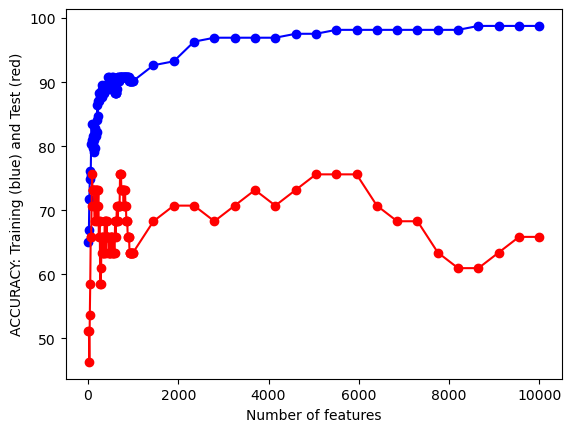

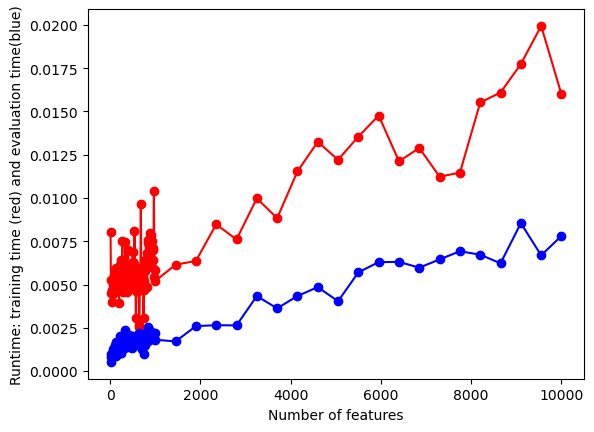

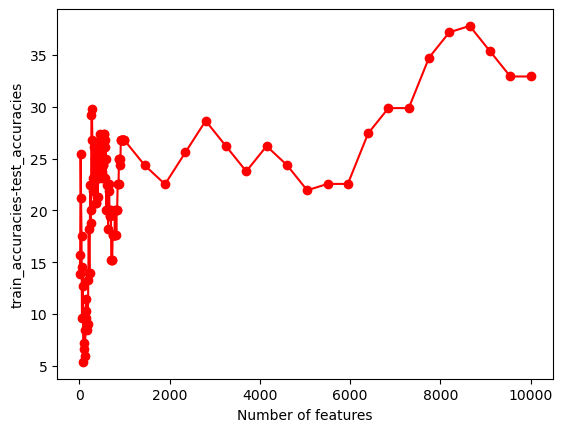

In [248]:
#UTILITY FUNCTION TO PLOT RESULTS
def plot_results(path_root):

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-ob')
    plt.plot(num_features,test_accuracies,'-or')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (blue) and Test (red)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()

# PLOT RESULTS
plot_results("../../data/Raw_Data_project_Pub.Transport_5000/Reddit_sentiment_data/results_naive_bayes")

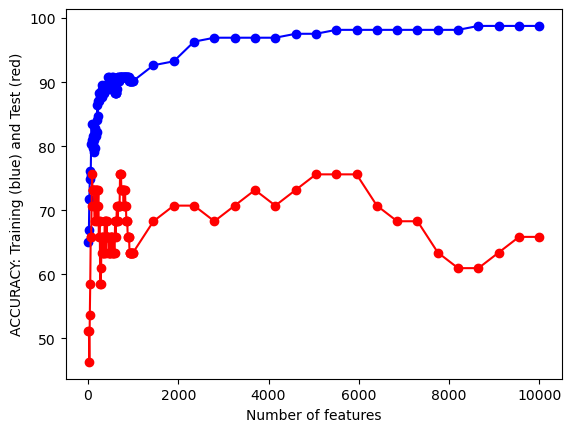

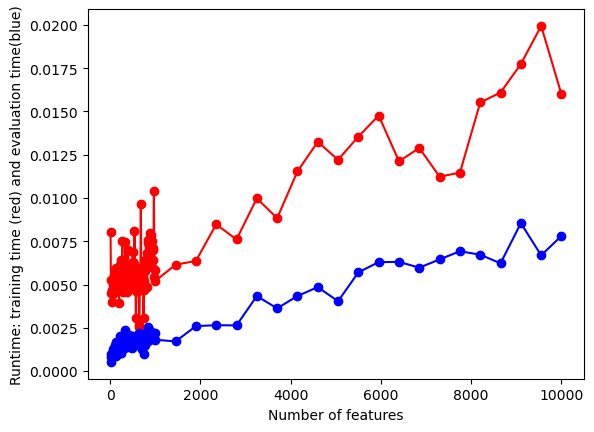

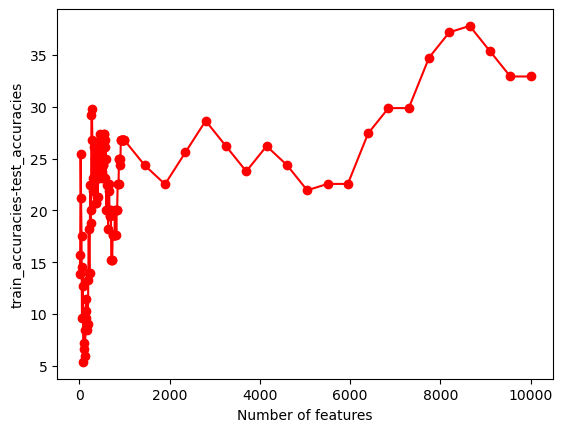

In [249]:
save_results("../../data/Raw_Data_project_Pub.Transport_5000/Reddit_sentiment_data/partial_grid_search")
plot_results("../../data/Raw_Data_project_Pub.Transport_5000/Reddit_sentiment_data/partial_grid_search")

Naive Bayes seems to do a good job in accruacy if the number of features is kept under 2000 or between 4000 and 6000.